In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [ ]:
%cd /mydrive/Heart\ Disease\ Prediction/

/content/gdrive/My Drive/Heart Disease Prediction


In [ ]:
!ls

heart.csv  pipe.pkl


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,RobustScaler

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1,168.0,0,1.0,2.0,2.0,3.0,0
1,53.0,1.0,0.0,140.0,203.0,1.0,0,155.0,1,3.1,0.0,0.0,3.0,0
2,70.0,1.0,0.0,145.0,174.0,0.0,1,125.0,1,2.6,0.0,0.0,3.0,0
3,61.0,1.0,0.0,NaN,203.0,0.0,1,161.0,0,0.0,2.0,1.0,3.0,0
4,62.0,0.0,0.0,138.0,294.0,1.0,1,106.0,0,1.9,1.0,3.0,2.0,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
len(df.columns)

14

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1024 non-null   float64
 1   sex       1024 non-null   float64
 2   cp        1023 non-null   float64
 3   trestbps  1023 non-null   float64
 4   chol      1024 non-null   float64
 5   fbs       1024 non-null   float64
 6   restecg   1025 non-null   int64  
 7   thalach   1022 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1024 non-null   float64
 11  ca        1024 non-null   float64
 12  thal      1024 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()

age         1
sex         1
cp          2
trestbps    2
chol        1
fbs         1
restecg     0
thalach     3
exang       0
oldpeak     0
slope       1
ca          1
thal        1
target      0
dtype: int64

<Axes: >

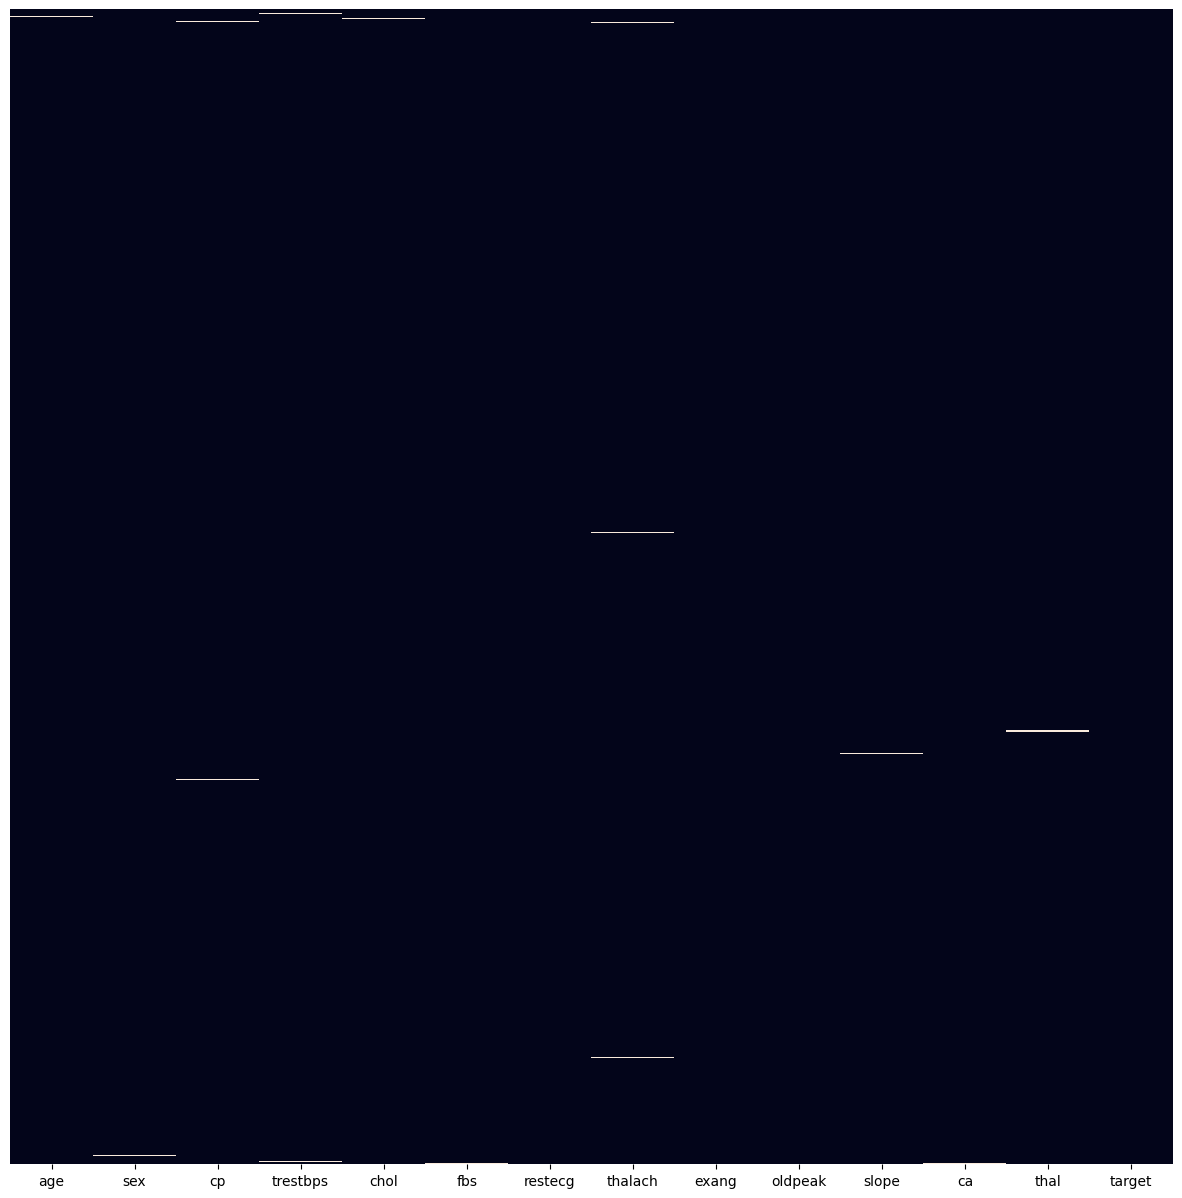

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [ ]:
categorical_columns = []
categorical_indices = []

numerical_columns = []
numerical_indices = []

for i in range(len(df.columns)):
  if df.columns[i]=='target':continue
  if df[df.columns[i]].nunique()<=4:
    categorical_columns.append(df.columns[i])
    categorical_indices.append(i)
  else:
    numerical_columns.append(df.columns[i])
    numerical_indices.append(i)


In [ ]:
print(f"{len(categorical_columns)}:{categorical_columns}")
print(f"{len(numerical_columns)}:{numerical_columns}")

7:['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
6:['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


In [ ]:
for i in categorical_columns:
  print(i)
  print(df[i].value_counts())
  print()

sex
1.0    712
0.0    312
Name: sex, dtype: int64

cp
0.0    495
2.0    284
1.0    167
3.0     77
Name: cp, dtype: int64

fbs
0.0    871
1.0    153
Name: fbs, dtype: int64

restecg
1    513
0    497
2     15
Name: restecg, dtype: int64

exang
0    680
1    345
Name: exang, dtype: int64

slope
1.0    481
2.0    469
0.0     74
Name: slope, dtype: int64

thal
2.0    543
3.0    410
1.0     64
0.0      7
Name: thal, dtype: int64



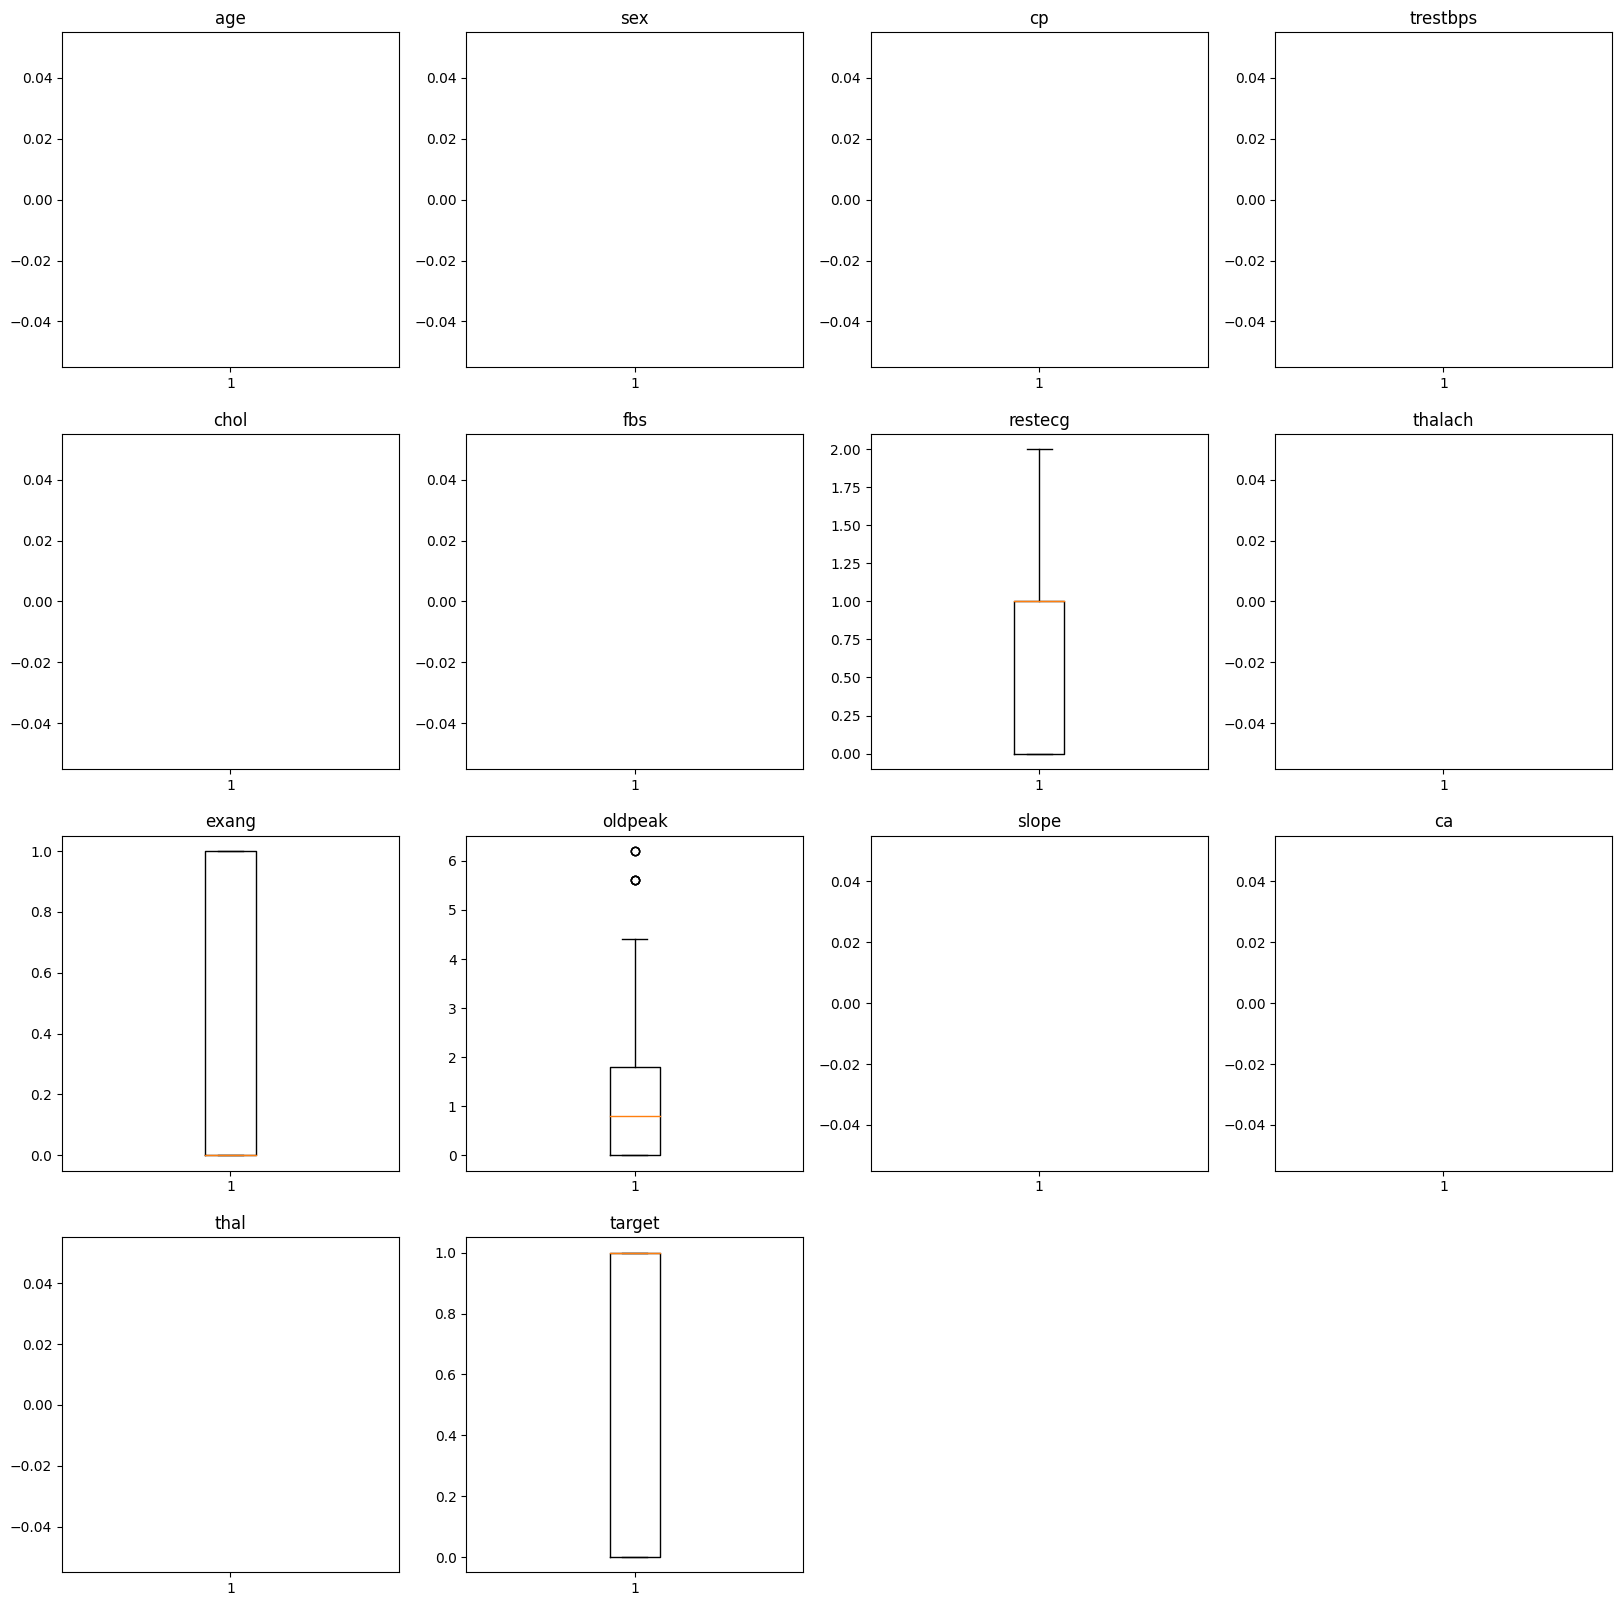

In [ ]:
x = 1
plt.figure(figsize = (20,20))

for i in df.columns:
    plt.subplot(4,4,x)
    plt.boxplot(df[i])
    plt.title(i)
    x = x+1

In [ ]:
X = df.drop(['target'],axis=1)
y = df['target']
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.3, random_state=31)

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore')),
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder='passthrough'
)

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [ ]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])]))])

In [ ]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print("confussion matrix")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("confussion matrix")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    dt_acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy :",dt_acc_score*100,'\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(max_iter=1000)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)
eval_metric(classifier1, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[116  25]
 [ 24 143]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       141
           1       0.85      0.86      0.85       167

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308


Train_Set
confussion matrix
[[300  58]
 [ 37 322]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       358
           1       0.85      0.90      0.87       359

    accuracy                           0.87       717
   macro avg       0.87      0.87      0.87       717
weighted avg       0.87      0.87      0.87       717


Accuracy : 84.0909090909091 



In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 2)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)

eval_metric(classifier2, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[141   0]
 [ 11 156]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       141
           1       1.00      0.93      0.97       167

    accuracy                           0.96       308
   macro avg       0.96      0.97      0.96       308
weighted avg       0.97      0.96      0.96       308


Train_Set
confussion matrix
[[358   0]
 [  1 358]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      1.00      1.00       359

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717


Accuracy : 96.42857142857143 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train, y_train)
y_pred = classifier3.predict(X_test)
eval_metric(classifier3, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[141   0]
 [  5 162]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       141
           1       1.00      0.97      0.98       167

    accuracy                           0.98       308
   macro avg       0.98      0.99      0.98       308
weighted avg       0.98      0.98      0.98       308


Train_Set
confussion matrix
[[358   0]
 [  1 358]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      1.00      1.00       359

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717


Accuracy : 98.37662337662337 



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 2)
classifier4.fit(X_train, y_train)
y_pred = classifier4.predict(X_test)

eval_metric(classifier4, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[141   0]
 [ 29 138]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       141
           1       1.00      0.83      0.90       167

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.92      0.91      0.91       308


Train_Set
confussion matrix
[[358   0]
 [ 12 347]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       358
           1       1.00      0.97      0.98       359

    accuracy                           0.98       717
   macro avg       0.98      0.98      0.98       717
weighted avg       0.98      0.98      0.98       717


Accuracy : 90.5844155844156 



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df.drop(['target'],axis=1),
                                                df['target'],
                                                test_size=0.3,
                                                random_state=31)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
#Numerical

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

#Categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore')),
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_indices),
        ('cat', categorical_transformer, categorical_indices)
    ],remainder='passthrough'
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  [0, 3, 4, 7, 9, 11]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 5, 6, 8, 10, 12])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
eval_metric(pipe, X_train, y_train, X_test, y_test)

Test_Set
confussion matrix
[[141   0]
 [  4 163]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       141
           1       1.00      0.98      0.99       167

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308


Train_Set
confussion matrix
[[357   1]
 [  0 359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       358
           1       1.00      1.00      1.00       359

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717


Accuracy : 98.7012987012987 



In [ ]:
import pickle

pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
pipe = pickle.load(open('pipe.pkl','rb'))

In [ ]:
df.iloc[102,:].values

array([ 54.,   1.,   1., 108., 309.,   0.,   1., 156.,   0.,   0.,   2.,
         0.,   3.,   1.])

In [ ]:
pipe.predict(df.iloc[102,:-1].values.reshape(1,13))

array([1])